<a href="https://colab.research.google.com/github/dooooing/2023-ESAA-/blob/main/0522_%EC%A0%9C%EC%B6%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch5_4_pg_303~310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### LinearRegression 클래스 - Ordinary Least Squares

In [ ]:
class sklarn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, j_jobs=1)

**입력 파라미터**

fit_intercept


*   불린 값
*   True (디폴트)
*   False : intercept 사용 X, 0으로 지정
*   intercept(절편) 값을 계산할 것인지 말지를 지정

normalize

*   True (디폴트) : 회귀 수행 전 입력 데이터 세트 정규화
*   False : 파라미터 무시

**속성**
coef


*   fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성
*   shape는 (Target 값 개수, 피처 개수)

**intercept_**

*   intercept 값



### 회귀 평가 지표

**MAE(Mean Absolute Error)**

*   실제 값과 예측값의 차이를 절댓값으로 변환해 평균
*   metrics.mean_absolute_error
*   'neg_mean_absolute_error'

**MSE(Mean Squared Error)**

*   실제 값과 예측값의 차이를 제곱해 평균
*   metrics.mean_squared_error
*   'neg_mean_squared_error'

**RMSE(Root Mean Squared Error)**

*   MSE에 루트를 씌운 것

**R^2**

*   분산 기반으로 예측 성능을 평가
*   실제 값의 분산 대비 예측값의 분산 비율
*   1에 가까울수록 예측 정확도가 높음
*   metrics.r2_score
*   'r2'

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.
feature_names=['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX'	,'PTRATIO',	'B'	,'LSTAT',	'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


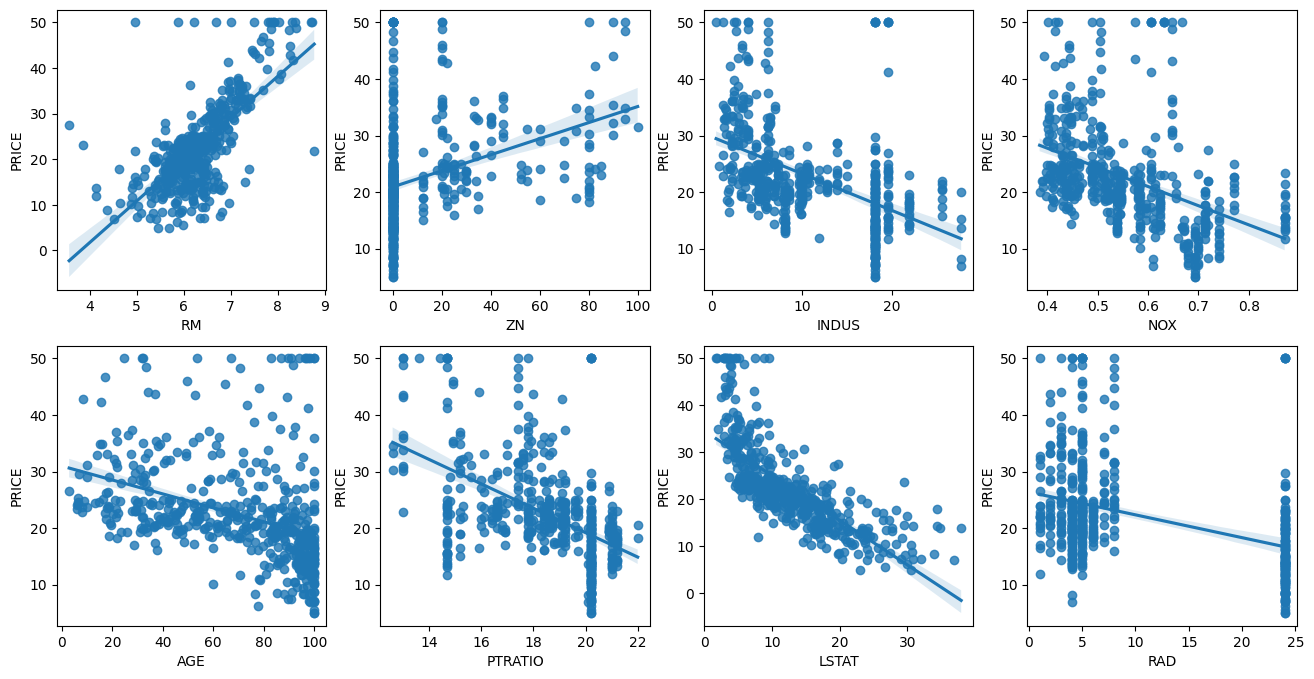

In [5]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO','LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 사본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [7]:
from scipy.sparse import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [8]:
print('절편 값:', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [11]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [12]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829
